In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.linear_model import LinearRegression # for linear regression model.
from sklearn.metrics import r2_score # to identify r_squared for regression model.


In [2]:
# Load the Airfares dataset
df = pd.read_csv('Airfares.csv')
df = df.drop(['S_CODE','S_CITY','E_CODE','E_CITY'], axis = 1)
df['FARE'] = df['FARE'].astype('float')
df.head()
# Get the numerical predictors



,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


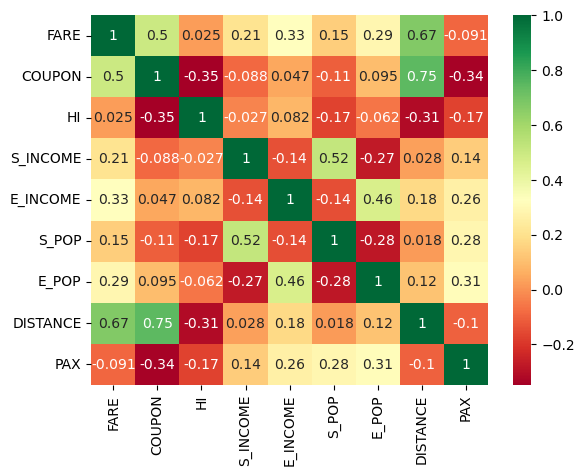

In [3]:
# Plot the correlation matrix
num_df = df[['FARE','COUPON','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX']]
sns.heatmap(num_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

# Observations -

If we look at the above heatmap it can be noticed that distance and coupon are correlated among themselves. This could be due to the fact that since fare ahs shown soe correlation bwith the distance, hence more the fare more the discount and hence more the distance. 



In [4]:
df.dtypes

COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [5]:
df['NEW'] = df['NEW'].astype('int')
df['VACATION'] = df['VACATION'].astype('category')
df['SW'] = df['SW'].astype('category')
df['SLOT'] = df['SLOT'].astype('category')
df['GATE'] = df['GATE'].astype('category')
df.dtypes

COUPON       float64
NEW            int64
VACATION    category
SW          category
HI           float64
S_INCOME     float64
E_INCOME     float64
S_POP          int64
E_POP          int64
SLOT        category
GATE        category
DISTANCE       int64
PAX            int64
FARE         float64
dtype: object

In [6]:
new_df = pd.get_dummies(df, prefix_sep = '_', drop_first=True)
new_df.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47,0,0,1,1
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76,0,0,1,1
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,0,1
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,1,1


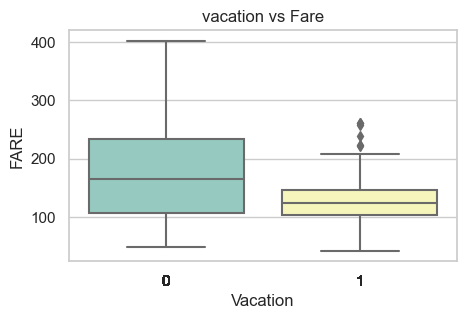

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(x='VACATION_Yes', y = 'FARE', data= new_df, palette="Set3")
plt.xlabel("Vacation")
plt.ylabel("FARE")
plt.title("vacation vs Fare")
plt.xticks(new_df['VACATION_Yes'])
plt.show()


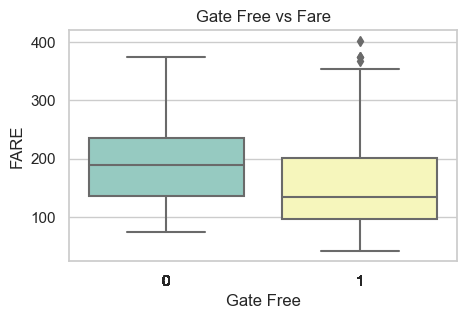

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(x='GATE_Free', y = 'FARE', data= new_df, palette="Set3")
plt.xlabel("Gate Free")
plt.ylabel("FARE")
plt.title("Gate Free vs Fare")
plt.xticks(new_df['GATE_Free'])
plt.show()


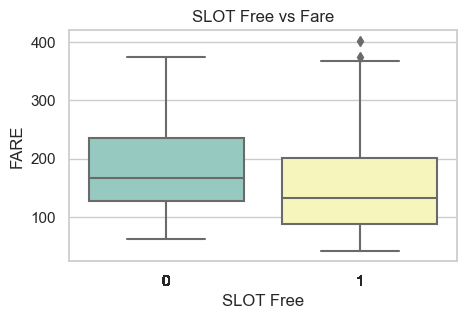

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(x='SLOT_Free', y = 'FARE', data= new_df, palette="Set3")
plt.xlabel("SLOT Free")
plt.ylabel("FARE")
plt.title("SLOT Free vs Fare")
plt.xticks(new_df['SLOT_Free'])
plt.show()

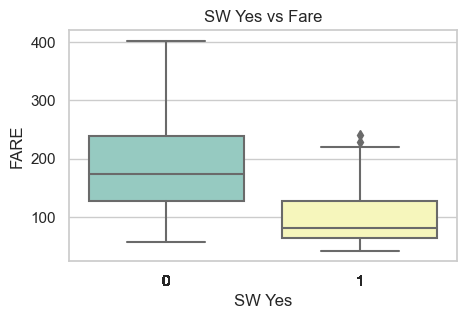

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(x='SW_Yes', y = 'FARE', data= new_df, palette="Set3")
plt.xlabel("SW Yes")
plt.ylabel("FARE")
plt.title("SW Yes vs Fare")
plt.xticks(new_df['SW_Yes'])
plt.show()

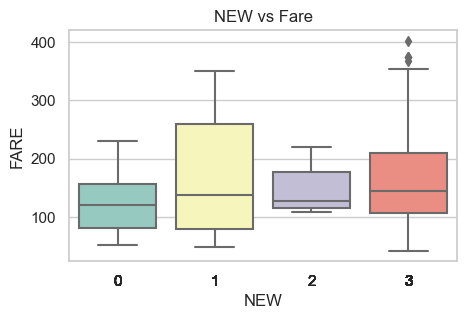

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(x='NEW', y = 'FARE', data= new_df, palette="Set3")
plt.xlabel("NEW")
plt.ylabel("FARE")
plt.title("NEW vs Fare")
plt.xticks(new_df['NEW'])
plt.show()

In [12]:
X2 = new_df[['VACATION_Yes','SW_Yes','SLOT_Free','GATE_Free']]
X2 = sm.add_constant(X2)
model = sm.OLS(new_df['FARE'], X2).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     92.78
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           4.49e-62
Time:                        16:37:49   Log-Likelihood:                -3520.8
No. Observations:                 638   AIC:                             7052.
Df Residuals:                     633   BIC:                             7074.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          213.6555      7.168     29.809      0.000     199.581     227.730
VACATION_Yes   -42.9095      5.529     -7.761      0.000     -53.767     -32.053
SW_Yes         -83.9268      5.661    -14.825      0.000     -95.044     -72.810
SLOT_Free       -9.6731      5.697     -1.698      0.090     -20.861       1.515
GATE_Free      -11.0614      6.498     -1.702      0.089     -23.822       1.699
==============================================================================
Omnibus:                       26.864   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.527
Skew:                           0.521   Prob(JB):                     3.88e-07
Kurtosis:                       2.848   Cond. No.                         6.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation

From the above table it shows that Vacation and SW have p value less that 0.05 which shoes there could be a correlation between Vacation and SW with the fare. 

So let me remove the two SLOT_FREE and GATE_Free from the model to see if it changes or improves teh R2 as well as p

In [13]:
X1 = new_df[['VACATION_Yes','SW_Yes']]
X1 = sm.add_constant(X1)
model = sm.OLS(new_df['FARE'], X1).fit()
summary1 = model.summary()
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.46e-63
Time:                        16:37:49   Log-Likelihood:                -3523.1
No. Observations:                 638   AIC:                             7052.
Df Residuals:                     635   BIC:                             7066.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          199.8950      3.205     62.363      0.000     193.601     206.189
VACATION_Yes   -45.2194      5.435     -8.319      0.000     -55.893     -34.546
SW_Yes         -88.6928      5.224    -16.979      0.000     -98.951     -78.435
==============================================================================
Omnibus:                       22.862   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.550
Skew:                           0.470   Prob(JB):                     4.67e-06
Kurtosis:                       2.801   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R2 value suggests these coefficients explain around 36% variability in prediction.



# Conclusion -->


1. It is evident from the Vacation and Fare box plot it seems people on vacation tends to pay lesser, and one could be the reason of booking the flights a bit earlier. This does impacts the prices and hence the people on vacation trip which may happen more unplanned seems to pay a bit higher on average. 

2. Gate Free tends to pay lesser then non gate free.

3. From the SW_Free it seems the PAX with SW as free tends to pay less in comparision to other PAX

Same was identified by model as well to so 36% of the variability was identified on the whole data.



# Develop a model to predict FARE
Summarize the accuracy measures based on the
validation data. What is the final model you would recommend to predict FARE?

In [14]:
new_df.columns

Index(['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE', 'PAX', 'FARE', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free',
       'GATE_Free'],
      dtype='object')

In [15]:
# partition data
X = new_df[['DISTANCE','VACATION_Yes','SW_Yes']]#,'VACATION_Yes','SW_Yes'
y = new_df['FARE']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
r2 = model.score(valid_X, valid_y)
print(r2)
train_results = pd.DataFrame({
    'FARE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

0.70504171904171
       FARE   predicted   residual
487  374.40  310.450523  63.949477
110  139.56  129.756474   9.803526
447  128.36  136.931094  -8.571094
363  186.28  158.913838  27.366162
434   69.60  152.029101 -82.429101


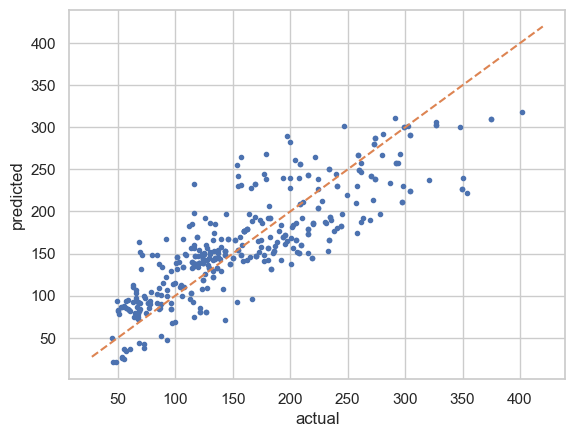

In [16]:
plt.plot(train_results.FARE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [17]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'FARE': valid_y, 
    'predicted': valid_pred, 
    'residual': valid_y - valid_pred
})
print(valid_results.head())

       FARE   predicted   residual
101  240.88  180.365229  60.514771
619  347.82  299.869769  47.950231
616  279.83  266.678090  13.151910
446  128.36  136.931094  -8.571094
522  289.25  298.637764  -9.387764


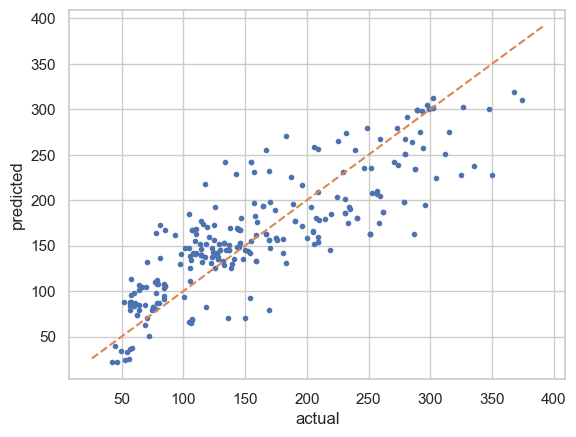

In [18]:
plt.plot(valid_results.FARE, valid_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

# Error metrics
We can use the metrics that scikit-learn provides.

In [20]:
print('Training set r2: ', r2_score(train_results.FARE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.FARE, valid_results.predicted))

Training set r2:  0.7092171755252248
Validation set r2:  0.70504171904171


In [21]:
# import the utility function regressionSummary
from dmba import regressionSummary

# training set
regressionSummary(train_results.FARE, train_results.predicted)

# validation set
regressionSummary(valid_results.FARE, valid_results.predicted)

no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 40.0635
            Mean Absolute Error (MAE) : 31.7410
          Mean Percentage Error (MPE) : -6.3229
Mean Absolute Percentage Error (MAPE) : 23.2462

Regression statistics

                      Mean Error (ME) : -1.2464
       Root Mean Squared Error (RMSE) : 42.5705
            Mean Absolute Error (MAE) : 33.7933
          Mean Percentage Error (MPE) : -8.0557
Mean Absolute Percentage Error (MAPE) : 25.1156
